# Groupe 1 Lyon


Ce dashboard propose une analyse approfondie de nos opérations de chaîne d'approvisionnement à travers plusieurs sources de données. L'objectif est d'identifier les indicateurs clés de performance (KPI) et de générer des insights exploitables pour optimiser la chaîne d'approvisionnement.

### Sources de Données (Concatener)

- Achats
- Commandes
- Expedition
- Produits


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



data = pd.read_csv('Features/Export_fe_data/achats_merged_features.csv', sep=",")
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,cout_total,delai_deviation,retard_jours,mois_achat,on_time_delivery
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,19443.0,8,8,3,0
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,5540.5,0,0,6,1
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,Lecomte et Fils,Zurich,Suisse,0.84,10,10543.5,-2,0,1,1
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,60385.0,1,1,11,0
4,PO000005,2024-06-07,P00196,50,S025,256.05,13,Techer SA,Varsovie,Pologne,0.92,12,12802.5,1,1,6,0


#### Nous allons d'abord definir quelque KPI principaux pour ces data :

In [23]:
def calculate_kpis(data):
    kpis = {
        'Total dépenses': f"{data['cout_total'].sum():,.2f} €",
        'Délai moyen livraison': f"{data['délai_livraison_jours'].mean():.1f} jours",
        'Taux livraison à temps': f"{(data['on_time_delivery'].mean()*100):.1f}%",
        'Nb fournisseurs actifs': len(data['id_fournisseur'].unique())
    }
    return kpis

calculate_kpis(data)

{'Total dépenses': '155,307,061.35 €',
 'Délai moyen livraison': '8.0 jours',
 'Taux livraison à temps': '46.9%',
 'Nb fournisseurs actifs': 50}

In [24]:
# Configuration 
sns.set_theme(style="whitegrid")


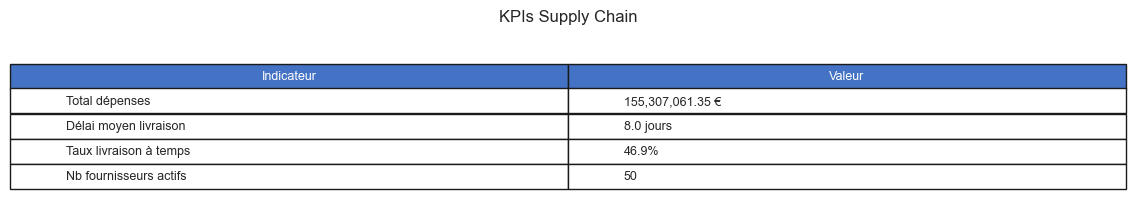

In [26]:
def display_kpis_styled(data):
    kpis = calculate_kpis(data)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = [[k, v] for k, v in kpis.items()]
    table = ax.table(cellText=table_data,
                    colLabels=['Indicateur', 'Valeur'],
                    loc='center',
                    cellLoc='left')
    
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)
    
    for j in range(2):
        table[(0, j)].set_facecolor('#4472C4')
        table[(0, j)].set_text_props(color='white')
    
    plt.title('KPIs Supply Chain', pad=20)
    return fig

# Affichage des visualisations
kpi_fig = display_kpis_styled(data)
plt.show()

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pays_depenses.reset_index(),
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_suppliers.reset_index(),
C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\2000364305.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')


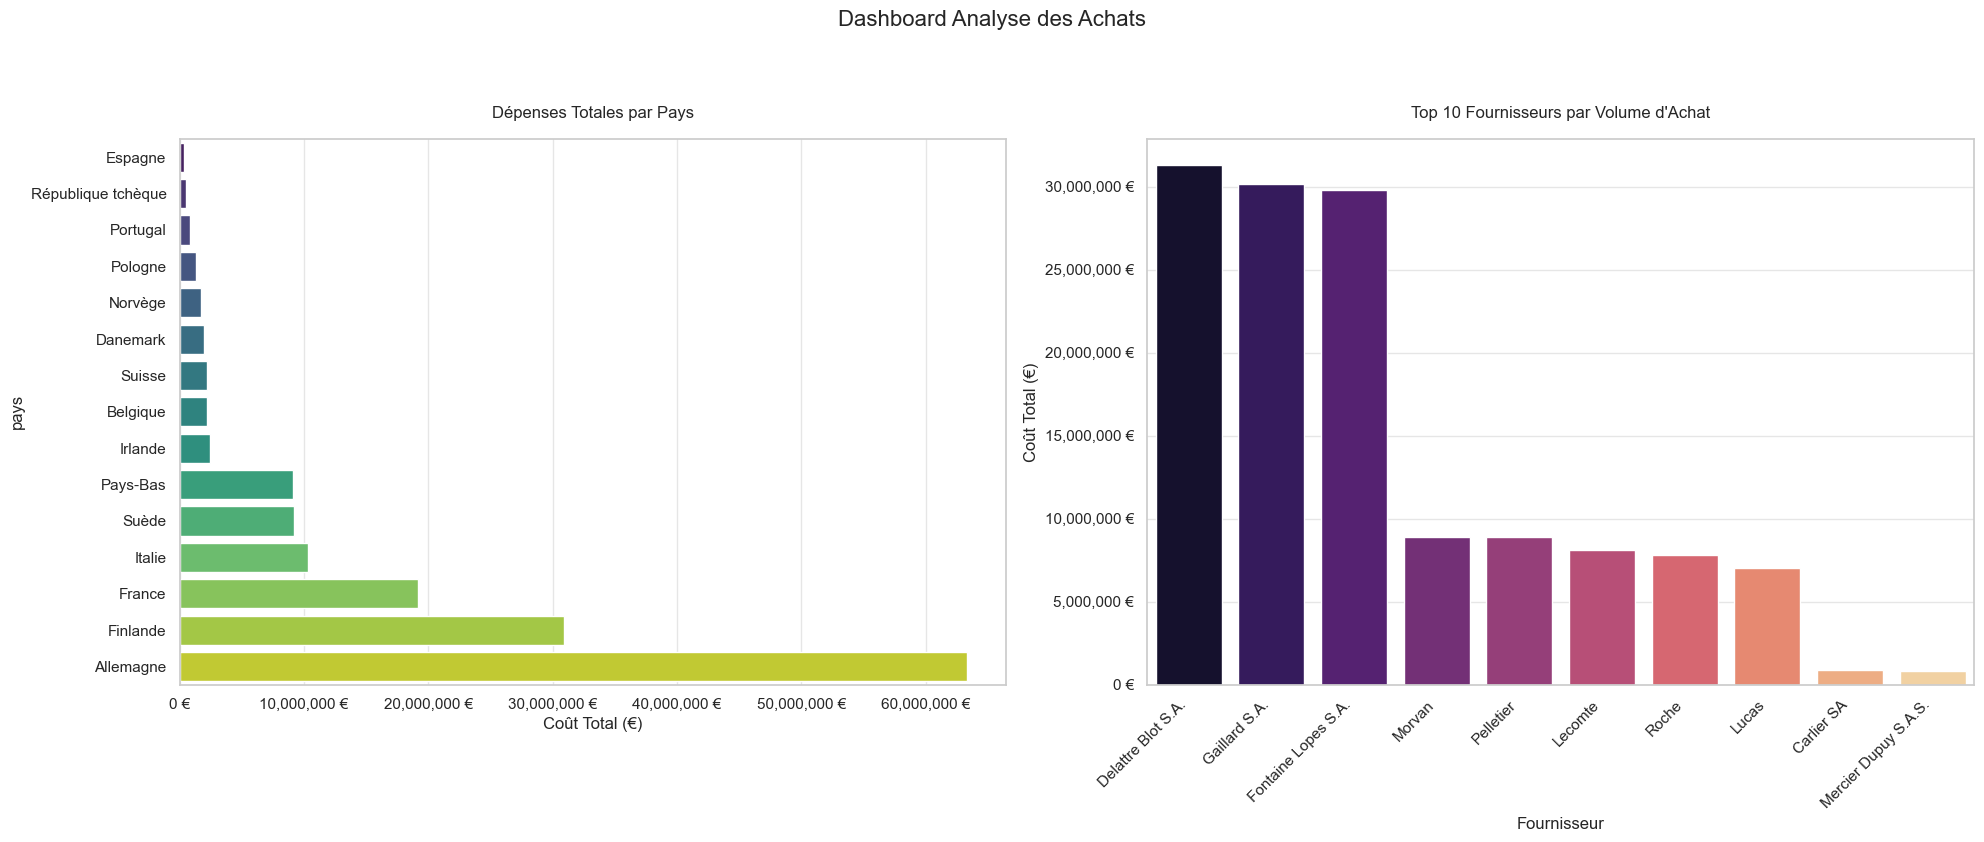

In [51]:
def create_dashboard_visualizations(data):
    # Create figure with 1x2 subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Dashboard Analyse des Achats', fontsize=16, y=1.05)

    # 1. Dépenses par pays
    pays_depenses = data.groupby('pays')['cout_total'].sum().sort_values(ascending=True)
    sns.barplot(data=pays_depenses.reset_index(), 
                y='pays', 
                x='cout_total',
                ax=axes[0],
                palette='viridis')
    axes[0].set_title('Dépenses Totales par Pays', pad=15)
    axes[0].set_xlabel('Coût Total (€)')
    
    # Format x-axis values with thousand separator
    axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f} €'))

    # 2. Top 10 fournisseurs
    top_suppliers = data.groupby('nom_fournisseur')['cout_total'].sum().nlargest(10)
    sns.barplot(data=top_suppliers.reset_index(), 
                x='nom_fournisseur', 
                y='cout_total',
                ax=axes[1],
                palette='magma')
    axes[1].set_title('Top 10 Fournisseurs par Volume d\'Achat', pad=15)
    axes[1].set_xlabel('Fournisseur')
    axes[1].set_ylabel('Coût Total (€)')
    
    # Rotation des labels sans le paramètre ha
    axes[1].tick_params(axis='x', rotation=45)
    # Ajustement de l'alignement des labels après rotation
    axes[1].set_xticklabels(axes[1].get_xticklabels(), ha='right')
    
    # Format y-axis values with thousand separator
    axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f} €'))

    # Adjust layout
    plt.tight_layout()
    return fig

# Create and display the dashboard
dashboard_fig = create_dashboard_visualizations(data)
plt.show()

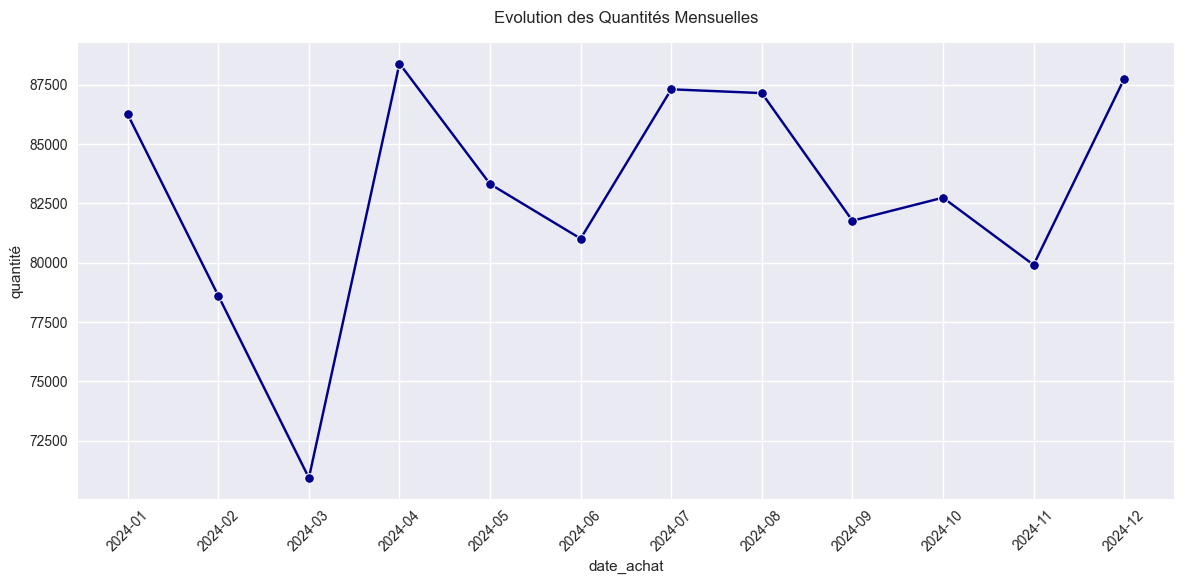

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3621557203.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,


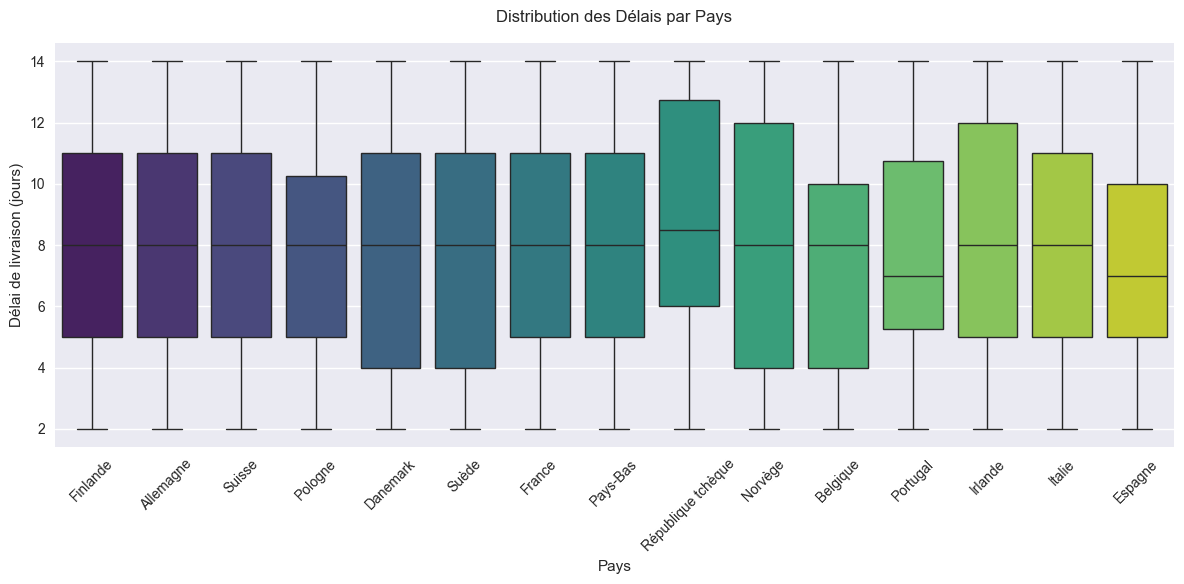

C:\Users\Jules\AppData\Local\Temp\ipykernel_3940\3621557203.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_otd.values,


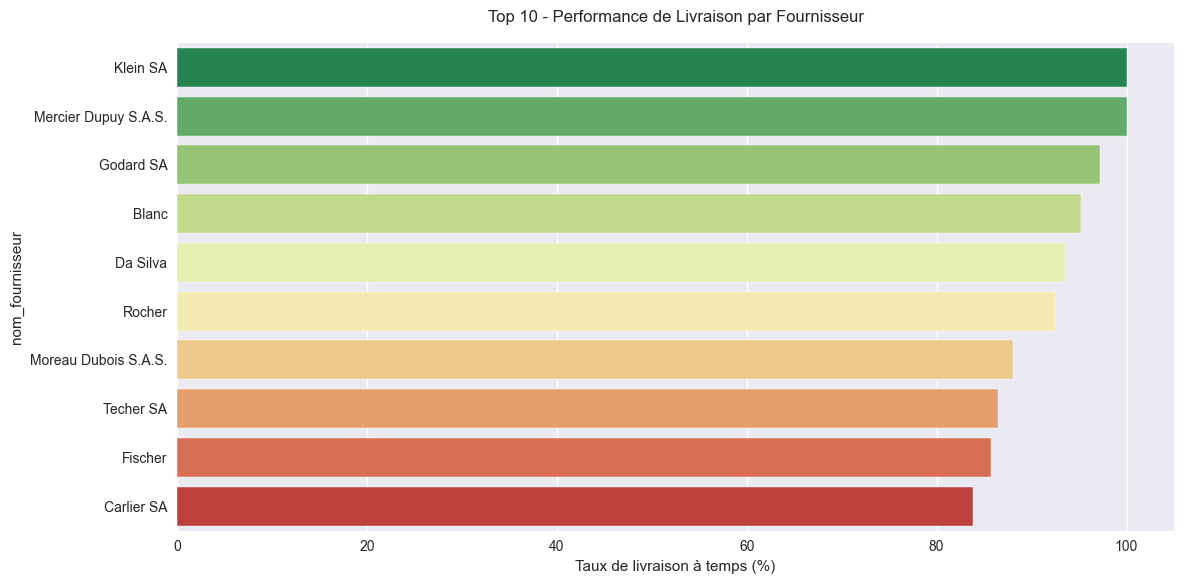

In [60]:
def create_individual_visualizations(data):
    plt.style.use('seaborn-v0_8')
    
    # 1. Evolution temporelle des quantités
    plt.figure(figsize=(12, 6))
    data['date_achat'] = pd.to_datetime(data['date_achat'])
    monthly_costs = data.groupby(data['date_achat'].dt.strftime('%Y-%m'))['quantité'].sum().reset_index()
    sns.lineplot(data=monthly_costs, 
                x='date_achat', 
                y='quantité',
                color='darkblue',
                marker='o')
    plt.title('Evolution des Quantités Mensuelles', pad=15)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 3. Distribution des délais par pays
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data,
                x='pays',
                y='délai_livraison_jours',
                palette='viridis')
    plt.title('Distribution des Délais par Pays', pad=15)
    plt.xticks(rotation=45)
    plt.xlabel('Pays')
    plt.ylabel('Délai de livraison (jours)')
    plt.tight_layout()
    plt.show()

    # 4. Performance de livraison par fournisseur (Top 10)
    plt.figure(figsize=(12, 6))
    on_time_perf = data.groupby('nom_fournisseur')['on_time_delivery'].mean() * 100
    top_10_otd = on_time_perf.nlargest(10)
    sns.barplot(x=top_10_otd.values,
                y=top_10_otd.index,
                palette='RdYlGn_r')
    plt.title('Top 10 - Performance de Livraison par Fournisseur', pad=15)
    plt.xlabel('Taux de livraison à temps (%)')
    plt.tight_layout()
    plt.show()

# Affichage des visualisations individuelles
create_individual_visualizations(data)

